<a href="https://colab.research.google.com/github/Patortiz26/IN6531-Miner-a-de-datos-2021-2/blob/main/Aux2_IN6531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auxiliar 2 - IN6531
**Autor: Patricio Ortiz**

##Pandas

Pandas es una herramienta de manipulación y análisis de datos de código abierto rápida, potente, flexible y fácil de usar [<https://pandas.pydata.org/>]. Este paquete de Python proporciona estructuras de datos similares a los dataframes de R (tablas con filas de observaciones y columnas de variables).

Pandas proporciona mecanismos eficientes para trabajar con diferentes formatos de datos como archivos CSV (del inglés comma-separated values), archivos de Excel o bases de datos. 

Las dos estructuras de datos principales de Pandas son: **Series** (Matriz unidimensional etiquetada de forma homogénea) y **DataFrame** (Estructura de datos bidimensional con columnas que pueden contener diferentes tipos de datos). Podríamos pensar en las estructuras de datos de Pandas como contenedores flexibles para datos de dimensiones inferiores. Por ejemplo, DataFrame es un contenedor para Series y Series es un contenedor para escalares [<https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html>].

![alt text](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)
Source:https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

###Crear dataframes 

* Convertir una lista, diccionario o matriz Numpy en un dataframe de Pandas.
* Abrir un archivo local usando Pandas, generalmente un archivo CSV, pero también podría ser un archivo de texto delimitado (como TSV), Excel, etc.
* Abrir un archivo o base de datos remota como un CSV o JSON en un sitio web a través de una URL o desde una tabla / base de datos SQL.

Un dataframe se crea de la siguiente manera

In [1]:
#Primero se debe importar la librería
import pandas as pd
import numpy as np

In [2]:
pd.DataFrame()

""


In [3]:
df = pd.DataFrame({
    'tienda_A': [123,421,256], 
    'tienda_B': [234,541,257],
    'tienda_C': [120,451,258]
})

df

,tienda_A,tienda_B,tienda_C
0,123,234,120
1,421,541,451
2,256,257,258


In [4]:
filas = ['ventas_t0', 'ventas_t1', 'ventas_t2']
columnas = ['tienda_A', 'tienda_B', 'tienda_C']
datos = [[123,421,256], [234,541,257], [120,451,258]]

df = pd.DataFrame(datos, filas, columnas)
df

,tienda_A,tienda_B,tienda_C
ventas_t0,123,421,256
ventas_t1,234,541,257
ventas_t2,120,451,258


In [5]:
datos_D = [53,398,1009]

df['tienda_D'] = datos_D
df

,tienda_A,tienda_B,tienda_C,tienda_D
ventas_t0,123,421,256,53
ventas_t1,234,541,257,398
ventas_t2,120,451,258,1009


In [6]:
df.tienda_D

ventas_t0      53
ventas_t1     398
ventas_t2    1009
Name: tienda_D, dtype: int64

##Lectura y manejo de datos

Para la lectura de datos utilizamos principalmente dos comandos:

 `pd.read_csv('Archivo.csv')` o `pd.read_excel('Archivo.xlsx')`



Para esta sección utilizaremos data sintetica creada con fines pedagogicos. El contexto de los datos es una empresa de Saas que tiene una base de datos con los datos de facturacion de sus clientes, las transacciones que realizan dichos clientes (cuanto usan el software), algunas caracteristicas de los clientes y un diccionario. Los archivos utilizados son: 'Fact.xlsx', 'Trans.csv', 'Caracteristicas.csv' y 'Diccionario.xlsx'

In [7]:
#libreria para cambio de directorio (entre otras cosas)
import os

In [8]:
os.chdir("/content/drive/My Drive/Colab Notebooks/IN6531 - Minería de Datos DII/Auxiliares IN6531/datos/aux2")

In [9]:
df = pd.read_excel('Fact.xlsx')
bd = pd.read_csv('Trans.csv')
di = pd.read_excel('Diccionario.xlsx')
de = pd.read_csv('Caracteristicas.csv')

In [10]:
df

,Unnamed: 0,Cliente,Facturado 1-2021,Facturado 2-2021,Facturado 3-2021,Facturado 4-2021
0,0,Cliente 0,100714.0,0.0,0.0,0.0
1,1,Cliente 1,86501.0,0.0,0.0,0.0
2,2,Cliente 2,170812.5,0.0,0.0,0.0
3,3,Cliente 3,119388.0,119388.0,0.0,0.0
4,4,Cliente 4,242125.0,242695.0,0.0,0.0
...,...,...,...,...,...,...
128,128,Cliente 128,449661.0,450718.0,1720509.0,1720509.0
129,129,Cliente 129,1300237.0,1181801.0,873725.0,1319890.0
130,130,Cliente 130,1512739.0,1103506.0,813202.0,1058969.0
131,131,Cliente 131,3803309.0,2370475.0,2298154.0,2432121.0


In [11]:
#Ver comienzo del archivo
df.head()

,Unnamed: 0,Cliente,Facturado 1-2021,Facturado 2-2021,Facturado 3-2021,Facturado 4-2021
0,0,Cliente 0,100714.0,0.0,0.0,0.0
1,1,Cliente 1,86501.0,0.0,0.0,0.0
2,2,Cliente 2,170812.5,0.0,0.0,0.0
3,3,Cliente 3,119388.0,119388.0,0.0,0.0
4,4,Cliente 4,242125.0,242695.0,0.0,0.0


In [12]:
#final del archivo
df.tail()

,Unnamed: 0,Cliente,Facturado 1-2021,Facturado 2-2021,Facturado 3-2021,Facturado 4-2021
128,128,Cliente 128,449661.0,450718.0,1720509.0,1720509.0
129,129,Cliente 129,1300237.0,1181801.0,873725.0,1319890.0
130,130,Cliente 130,1512739.0,1103506.0,813202.0,1058969.0
131,131,Cliente 131,3803309.0,2370475.0,2298154.0,2432121.0
132,132,Cliente 132,7710373.0,7378915.0,5170429.0,7225185.0


In [13]:
#seleccionar ciertas columnas
df = df[['Cliente', 'Facturado 1-2021', 'Facturado 2-2021', 'Facturado 3-2021', 'Facturado 4-2021']]
df.head()

,Cliente,Facturado 1-2021,Facturado 2-2021,Facturado 3-2021,Facturado 4-2021
0,Cliente 0,100714.0,0.0,0.0,0.0
1,Cliente 1,86501.0,0.0,0.0,0.0
2,Cliente 2,170812.5,0.0,0.0,0.0
3,Cliente 3,119388.0,119388.0,0.0,0.0
4,Cliente 4,242125.0,242695.0,0.0,0.0


In [14]:
#ver forma del dataframe
df.shape

(133, 5)

In [15]:
#ver columnas
df.columns

Index(['Cliente', 'Facturado 1-2021', 'Facturado 2-2021', 'Facturado 3-2021',
       'Facturado 4-2021'],
      dtype='object')

In [16]:
#cambiar nombre de columnas
df.columns = ['Cliente','Factura_ene','Factura_feb','Factura_mar','Factura_abr']

#Forma_2
df = df.rename(columns={'Factura_ene':'Fact1',
                        'Factura_feb':'Fact2',
                        'Factura_mar':'Fact3',
                        'Factura_abr':'Fact4'})

df.head(3)

,Cliente,Fact1,Fact2,Fact3,Fact4
0,Cliente 0,100714.0,0.0,0.0,0.0
1,Cliente 1,86501.0,0.0,0.0,0.0
2,Cliente 2,170812.5,0.0,0.0,0.0


In [17]:
bd.head()

,Unnamed: 0,index,Transacciones 2021-01,Transacciones 2021-02,Transacciones 2021-03,Transacciones 2021-04
0,0,User #0,561,1021,1097,713
1,1,User #1,2,3,3,9
2,2,User #2,90,0,0,0
3,3,User #3,307,154,257,362
4,4,User #4,352,480,706,897


In [18]:
bd = bd[['index', 'Transacciones 2021-01', 'Transacciones 2021-02','Transacciones 2021-03', 'Transacciones 2021-04']]

bd.columns = ['Cliente','Trans1','Trans2','Trans3','Trans4']
bd.head()

,Cliente,Trans1,Trans2,Trans3,Trans4
0,User #0,561,1021,1097,713
1,User #1,2,3,3,9
2,User #2,90,0,0,0
3,User #3,307,154,257,362
4,User #4,352,480,706,897


In [19]:
di = di[['Cuenta_Web','Cuenta_Facturacion']]
di.head()

,Cuenta_Web,Cuenta_Facturacion
0,User #101,Cliente 115
1,User #68,Cliente 112
2,User #163,Cliente 9
3,User #89,Cliente 58
4,User #13,Cliente 40


In [20]:
de.head()

,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 0,Retail,Metropolitana,No,Marzo,NaN,NaN,No,15.0,NaN,34.0,13.0
1,Cliente 1,Salud,Coquimbo,Si,NaN,Abril,NaN,No,33.0,27.0,12.0,NaN
2,Cliente 2,Mineria,Antofagasta,No,NaN,Abril,Camila,No,2.0,35.0,9.0,14.0
3,Cliente 3,Retail,Valparaiso,No,NaN,Marzo,NaN,No,2.0,8.0,NaN,11.0
4,Cliente 4,Mineria,Antofagasta,Si,NaN,Marzo,NaN,No,29.0,29.0,NaN,2.0


In [21]:
#valores unicos de un dataframe
de.rubro.unique()

array(['Retail', 'Salud', 'Mineria', 'Agricultura', 'Electronica', nan],
      dtype=object)

In [22]:
#tipo de variables por columna
de.dtypes

cliente             object
rubro               object
region              object
antiguos            object
primer_contacto     object
ultimo_contacto     object
encargado           object
descuento           object
reclamos1          float64
reclamos2          float64
reclamos3          float64
reclamos4          float64
dtype: object

In [23]:
#describir valores numericos de cada columna
df.describe()

,Fact1,Fact2,Fact3,Fact4
count,1.330000e+02,1.330000e+02,1.330000e+02,1.330000e+02
mean,2.809917e+05,2.560514e+05,2.456891e+05,2.782141e+05
std,7.443430e+05,6.675897e+05,5.023177e+05,6.728408e+05
min,4.820100e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.210590e+05,1.213480e+05,1.221035e+05,1.225490e+05
50%,1.729400e+05,1.733530e+05,1.744340e+05,1.750700e+05
75%,2.400000e+05,2.400000e+05,2.427180e+05,2.450980e+05
max,7.710373e+06,7.378915e+06,5.170429e+06,7.225185e+06


In [24]:
#y si pruebo con algo sin enteros?
di.describe()

,Cuenta_Web,Cuenta_Facturacion
count,143,143
unique,143,121
top,User #20,Cliente 74
freq,1,5


In [25]:
#analizar vacios
de.isna().sum()

cliente              0
rubro                7
region               0
antiguos             0
primer_contacto     81
ultimo_contacto     52
encargado          125
descuento            0
reclamos1           33
reclamos2            9
reclamos3           23
reclamos4           27
dtype: int64

In [26]:
bd.Trans1.value_counts()

1       7
2       7
7       3
3       3
4       3
       ..
1177    1
2026    1
7991    1
917     1
2681    1
Name: Trans1, Length: 178, dtype: int64

También es posible obtener estadísticas sobre todo el dataframe o una serie (una columna, etc.):

*   *df.mean()* Returns the mean of all columns
*   *df.corr()* Returns the correlation between columns in a data frame
*   *df.count()* Returns the number of non-null values in each data frame column
*   *df.max()* Returns the highest value in each column
*   *df.min()* Returns the lowest value in each column
*   *df.median()* Returns the median of each column
*   *df.std()* Returns the standard deviation of each column

In [27]:
# Convertir un dataframe en tabla (array)
# Usamos [0:5] para imprimir solo 5 ejemplos
df.values[0:5]

array([['Cliente 0', 100714.0, 0.0, 0.0, 0.0],
       ['Cliente 1', 86501.0, 0.0, 0.0, 0.0],
       ['Cliente 2', 170812.5, 0.0, 0.0, 0.0],
       ['Cliente 3', 119388.0, 119388.0, 0.0, 0.0],
       ['Cliente 4', 242125.0, 242695.0, 0.0, 0.0]], dtype=object)

In [28]:
df.iloc[:,1:].head()

,Fact1,Fact2,Fact3,Fact4
0,100714.0,0.0,0.0,0.0
1,86501.0,0.0,0.0,0.0
2,170812.5,0.0,0.0,0.0
3,119388.0,119388.0,0.0,0.0
4,242125.0,242695.0,0.0,0.0


In [29]:
df.iloc[:,1:].values[0:5]

array([[100714. ,      0. ,      0. ,      0. ],
       [ 86501. ,      0. ,      0. ,      0. ],
       [170812.5,      0. ,      0. ,      0. ],
       [119388. , 119388. ,      0. ,      0. ],
       [242125. , 242695. ,      0. ,      0. ]])

###Sorting
El método sort_index se utiliza para ordenar el dataframe por filas o columnas. El valor 0 identifica las filas y 1 identifica las columnas.

In [30]:
# Sort filas descendiente en el indice
df.sort_index(axis=0, ascending=False)

,Cliente,Fact1,Fact2,Fact3,Fact4
132,Cliente 132,7710373.0,7378915.0,5170429.0,7225185.0
131,Cliente 131,3803309.0,2370475.0,2298154.0,2432121.0
130,Cliente 130,1512739.0,1103506.0,813202.0,1058969.0
129,Cliente 129,1300237.0,1181801.0,873725.0,1319890.0
128,Cliente 128,449661.0,450718.0,1720509.0,1720509.0
...,...,...,...,...,...
4,Cliente 4,242125.0,242695.0,0.0,0.0
3,Cliente 3,119388.0,119388.0,0.0,0.0
2,Cliente 2,170812.5,0.0,0.0,0.0
1,Cliente 1,86501.0,0.0,0.0,0.0


Tambien se puede ordenar por una o mas columnas

In [31]:
df.sort_values(by=['Fact4', 'Fact3'], ascending=False)

,Cliente,Fact1,Fact2,Fact3,Fact4
132,Cliente 132,7710373.0,7378915.0,5170429.0,7225185.0
131,Cliente 131,3803309.0,2370475.0,2298154.0,2432121.0
128,Cliente 128,449661.0,450718.0,1720509.0,1720509.0
129,Cliente 129,1300237.0,1181801.0,873725.0,1319890.0
130,Cliente 130,1512739.0,1103506.0,813202.0,1058969.0
...,...,...,...,...,...
0,Cliente 0,100714.0,0.0,0.0,0.0
1,Cliente 1,86501.0,0.0,0.0,0.0
2,Cliente 2,170812.5,0.0,0.0,0.0
3,Cliente 3,119388.0,119388.0,0.0,0.0


###Seleccionar / Consultar

Las columnas individuales se pueden seleccionar con el operador [] o directamente como atributos:

In [32]:
de['rubro'] 

0           Retail
1            Salud
2          Mineria
3           Retail
4          Mineria
          ...     
128          Salud
129        Mineria
130    Electronica
131    Electronica
132    Agricultura
Name: rubro, Length: 133, dtype: object

In [33]:
de.rubro

0           Retail
1            Salud
2          Mineria
3           Retail
4          Mineria
          ...     
128          Salud
129        Mineria
130    Electronica
131    Electronica
132    Agricultura
Name: rubro, Length: 133, dtype: object

In [34]:
#mas de una columna
de[['rubro','region']]

,rubro,region
0,Retail,Metropolitana
1,Salud,Coquimbo
2,Mineria,Antofagasta
3,Retail,Valparaiso
4,Mineria,Antofagasta
...,...,...
128,Salud,Metropolitana
129,Mineria,Antofagasta
130,Electronica,Coquimbo
131,Electronica,Metropolitana


In [35]:
#mas de una columna y ciertas filas 
# usar [:] indica usar todo
de.iloc[1:8,1:4]

,rubro,region,antiguos
1,Salud,Coquimbo,Si
2,Mineria,Antofagasta,No
3,Retail,Valparaiso,No
4,Mineria,Antofagasta,Si
5,Mineria,Antofagasta,No
6,Agricultura,Maule,No
7,Electronica,Coquimbo,No


La mayoría de las veces, necesitamos seleccionar por una condición en los valores de la celda. Para hacerlo, proporcionamos una matriz booleana que indica qué filas se seleccionarán. El truco es que pandas predefine muchos operadores booleanos para sus dataframes y series. Por ejemplo, la siguiente expresión produce una matriz booleana:

In [36]:
# Produce un array de booleanos
de.rubro == 'Mineria'

0      False
1      False
2       True
3      False
4       True
       ...  
128    False
129     True
130    False
131    False
132    False
Name: rubro, Length: 133, dtype: bool

Esto nos permite escribir queries así:

In [37]:
condicion = (de.rubro == 'Mineria')
de[condicion].head()

#esto es equivalente a de[de.rubro == 'Mineria]

,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
2,Cliente 2,Mineria,Antofagasta,No,NaN,Abril,Camila,No,2.0,35.0,9.0,14.0
4,Cliente 4,Mineria,Antofagasta,Si,NaN,Marzo,NaN,No,29.0,29.0,NaN,2.0
5,Cliente 5,Mineria,Antofagasta,No,NaN,Abril,NaN,No,35.0,13.0,10.0,33.0
8,Cliente 8,Mineria,Antofagasta,No,Marzo,NaN,NaN,No,28.0,13.0,29.0,10.0
14,Cliente 14,Mineria,Antofagasta,No,Enero,NaN,NaN,No,32.0,NaN,2.0,2.0


In [38]:
#seleccion por lista
de[de.rubro.isin(['Mineria','Salud'])]

,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
1,Cliente 1,Salud,Coquimbo,Si,NaN,Abril,NaN,No,33.0,27.0,12.0,NaN
2,Cliente 2,Mineria,Antofagasta,No,NaN,Abril,Camila,No,2.0,35.0,9.0,14.0
4,Cliente 4,Mineria,Antofagasta,Si,NaN,Marzo,NaN,No,29.0,29.0,NaN,2.0
5,Cliente 5,Mineria,Antofagasta,No,NaN,Abril,NaN,No,35.0,13.0,10.0,33.0
8,Cliente 8,Mineria,Antofagasta,No,Marzo,NaN,NaN,No,28.0,13.0,29.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
125,Cliente 125,Salud,Metropolitana,No,NaN,Marzo,NaN,No,15.0,14.0,10.0,NaN
126,Cliente 126,Mineria,Antofagasta,No,NaN,Abril,NaN,No,NaN,2.0,2.0,13.0
127,Cliente 127,Salud,Coquimbo,No,NaN,Enero,NaN,No,10.0,11.0,NaN,7.0
128,Cliente 128,Salud,Metropolitana,Si,NaN,Abril,NaN,No,16.0,2.0,27.0,8.0


In [39]:
#seleccion con condiciones en distintas columnas (con AND)
de[(de.rubro == 'Salud') & (de.region == 'Metropolitana')] 

,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
10,Cliente 10,Salud,Metropolitana,No,NaN,Marzo,NaN,No,2.0,2.0,27.0,2.0
11,Cliente 11,Salud,Metropolitana,Si,NaN,Abril,NaN,No,NaN,34.0,7.0,7.0
28,Cliente 28,Salud,Metropolitana,No,NaN,Enero,NaN,No,NaN,12.0,14.0,29.0
36,Cliente 36,Salud,Metropolitana,No,NaN,Abril,NaN,No,NaN,29.0,28.0,NaN
41,Cliente 41,Salud,Metropolitana,No,Marzo,NaN,NaN,No,16.0,2.0,33.0,11.0
43,Cliente 43,Salud,Metropolitana,No,Marzo,NaN,NaN,No,28.0,2.0,NaN,NaN
47,Cliente 47,Salud,Metropolitana,No,Febrero,NaN,NaN,No,2.0,6.0,10.0,2.0
49,Cliente 49,Salud,Metropolitana,No,NaN,Abril,NaN,No,NaN,28.0,2.0,33.0
65,Cliente 65,Salud,Metropolitana,No,NaN,Febrero,Camila,No,13.0,14.0,NaN,30.0
69,Cliente 69,Salud,Metropolitana,No,Abril,NaN,NaN,No,NaN,32.0,NaN,10.0


In [40]:
# seleccion con condiciones en distintas columnas (con OR)
de[(de.rubro == 'Salud') | (de.region == 'Valparaiso')] 

,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
1,Cliente 1,Salud,Coquimbo,Si,NaN,Abril,NaN,No,33.0,27.0,12.0,NaN
3,Cliente 3,Retail,Valparaiso,No,NaN,Marzo,NaN,No,2.0,8.0,NaN,11.0
10,Cliente 10,Salud,Metropolitana,No,NaN,Marzo,NaN,No,2.0,2.0,27.0,2.0
11,Cliente 11,Salud,Metropolitana,Si,NaN,Abril,NaN,No,NaN,34.0,7.0,7.0
16,Cliente 16,Retail,Valparaiso,No,Marzo,NaN,NaN,No,12.0,27.0,2.0,2.0
21,Cliente 21,Retail,Valparaiso,No,Febrero,NaN,NaN,No,2.0,15.0,35.0,15.0
24,Cliente 24,Salud,Coquimbo,Si,NaN,Abril,NaN,No,NaN,2.0,9.0,NaN
28,Cliente 28,Salud,Metropolitana,No,NaN,Enero,NaN,No,NaN,12.0,14.0,29.0
35,Cliente 35,Retail,Valparaiso,No,Abril,NaN,NaN,No,NaN,10.0,NaN,NaN
36,Cliente 36,Salud,Metropolitana,No,NaN,Abril,NaN,No,NaN,29.0,28.0,NaN


In [41]:
# Una query viendo el contenido de string
de[(de.rubro.str.contains('Sal')) & (de.rubro != np.nan)]

,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
1,Cliente 1,Salud,Coquimbo,Si,NaN,Abril,NaN,No,33.0,27.0,12.0,NaN
10,Cliente 10,Salud,Metropolitana,No,NaN,Marzo,NaN,No,2.0,2.0,27.0,2.0
11,Cliente 11,Salud,Metropolitana,Si,NaN,Abril,NaN,No,NaN,34.0,7.0,7.0
24,Cliente 24,Salud,Coquimbo,Si,NaN,Abril,NaN,No,NaN,2.0,9.0,NaN
28,Cliente 28,Salud,Metropolitana,No,NaN,Enero,NaN,No,NaN,12.0,14.0,29.0
36,Cliente 36,Salud,Metropolitana,No,NaN,Abril,NaN,No,NaN,29.0,28.0,NaN
41,Cliente 41,Salud,Metropolitana,No,Marzo,NaN,NaN,No,16.0,2.0,33.0,11.0
43,Cliente 43,Salud,Metropolitana,No,Marzo,NaN,NaN,No,28.0,2.0,NaN,NaN
47,Cliente 47,Salud,Metropolitana,No,Febrero,NaN,NaN,No,2.0,6.0,10.0,2.0
49,Cliente 49,Salud,Metropolitana,No,NaN,Abril,NaN,No,NaN,28.0,2.0,33.0


###Modificar dataframes

Las operaciones de Pandas tienden a producir nuevos dataframes en lugar de modificar los proporcionados. Muchas operaciones tienen el parámetro `inplace` booleano opcional que podemos usar para forzar a Pandas a aplicar los cambios al dataframe en cuestión.

También es posible asignar directamente los valores en celdas, columnas y selecciones de la siguiente manera:

In [42]:
# Modifies the cell identified by its row index and column name (using df.at)
de.at[1, 'encargado'] = 'Richard' 
de.head()

,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 0,Retail,Metropolitana,No,Marzo,NaN,NaN,No,15.0,NaN,34.0,13.0
1,Cliente 1,Salud,Coquimbo,Si,NaN,Abril,Richard,No,33.0,27.0,12.0,NaN
2,Cliente 2,Mineria,Antofagasta,No,NaN,Abril,Camila,No,2.0,35.0,9.0,14.0
3,Cliente 3,Retail,Valparaiso,No,NaN,Marzo,NaN,No,2.0,8.0,NaN,11.0
4,Cliente 4,Mineria,Antofagasta,Si,NaN,Marzo,NaN,No,29.0,29.0,NaN,2.0


In [43]:
# Modifies the cell identified by its absolute row and column indices
de.iat[0, 6] = 'Richard' 
de.head()

,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 0,Retail,Metropolitana,No,Marzo,NaN,Richard,No,15.0,NaN,34.0,13.0
1,Cliente 1,Salud,Coquimbo,Si,NaN,Abril,Richard,No,33.0,27.0,12.0,NaN
2,Cliente 2,Mineria,Antofagasta,No,NaN,Abril,Camila,No,2.0,35.0,9.0,14.0
3,Cliente 3,Retail,Valparaiso,No,NaN,Marzo,NaN,No,2.0,8.0,NaN,11.0
4,Cliente 4,Mineria,Antofagasta,Si,NaN,Marzo,NaN,No,29.0,29.0,NaN,2.0


In [44]:
# Creates or Replaces a column with a numpy array or a simple list.
promedio = [df.iloc[i,1:].sum()/4 for i in range(len(df))] #lista que calcula el promedio de forma 'bruta'
df.loc[:,'Promedio_fact'] = promedio #notar que como hay ceros deberiamos tratarlo de manera especial
df.head()

,Cliente,Fact1,Fact2,Fact3,Fact4,Promedio_fact
0,Cliente 0,100714.0,0.0,0.0,0.0,25178.500
1,Cliente 1,86501.0,0.0,0.0,0.0,21625.250
2,Cliente 2,170812.5,0.0,0.0,0.0,42703.125
3,Cliente 3,119388.0,119388.0,0.0,0.0,59694.000
4,Cliente 4,242125.0,242695.0,0.0,0.0,121205.000


In [45]:
# Equivalent to the previous
fugado = [1 if df.Fact4[i] == 0 else 0 for i in range(len(df))] #lista que analiza si el cliente se ha (o no) fugado
df['Fugado'] = fugado
df

,Cliente,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado
0,Cliente 0,100714.0,0.0,0.0,0.0,25178.500,1
1,Cliente 1,86501.0,0.0,0.0,0.0,21625.250,1
2,Cliente 2,170812.5,0.0,0.0,0.0,42703.125,1
3,Cliente 3,119388.0,119388.0,0.0,0.0,59694.000,1
4,Cliente 4,242125.0,242695.0,0.0,0.0,121205.000,1
...,...,...,...,...,...,...,...
128,Cliente 128,449661.0,450718.0,1720509.0,1720509.0,1085349.250,0
129,Cliente 129,1300237.0,1181801.0,873725.0,1319890.0,1168913.250,0
130,Cliente 130,1512739.0,1103506.0,813202.0,1058969.0,1122104.000,0
131,Cliente 131,3803309.0,2370475.0,2298154.0,2432121.0,2726014.750,0


A menudo es útil crear nuevas columnas basadas en las existentes utilizando una función. Las nuevas columnas a menudo se denominan características derivadas:

In [46]:
def f(f1,f2,f3,f4):
  valor = f1+f2+f3+f4
  return valor

# Uses the unary function f to create a new column based on existings ones
df['suma'] = f(df.Fact1,df.Fact2,df.Fact3,df.Fact4) 
df

,Cliente,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma
0,Cliente 0,100714.0,0.0,0.0,0.0,25178.500,1,100714.0
1,Cliente 1,86501.0,0.0,0.0,0.0,21625.250,1,86501.0
2,Cliente 2,170812.5,0.0,0.0,0.0,42703.125,1,170812.5
3,Cliente 3,119388.0,119388.0,0.0,0.0,59694.000,1,238776.0
4,Cliente 4,242125.0,242695.0,0.0,0.0,121205.000,1,484820.0
...,...,...,...,...,...,...,...,...
128,Cliente 128,449661.0,450718.0,1720509.0,1720509.0,1085349.250,0,4341397.0
129,Cliente 129,1300237.0,1181801.0,873725.0,1319890.0,1168913.250,0,4675653.0
130,Cliente 130,1512739.0,1103506.0,813202.0,1058969.0,1122104.000,0,4488416.0
131,Cliente 131,3803309.0,2370475.0,2298154.0,2432121.0,2726014.750,0,10904059.0


In [47]:
# def g(f1,f2,f3,f4):
#   if (f1 == 0) or (f2 == 0) or (f3 == 0) or (f4 == 0):
#     return np.nan
#   else:
#     valor = f1*0.1 + f2*0.2 +f3*0.3 +f4*0.4
#     return valor

# # Uses the unary function f to create a new column based on existings ones
# df['mean'] = g(df.Fact1,df.Fact2,df.Fact3,df.Fact4) 
# df

In [48]:
def g(f1,f2,f3,f4):
  if (f1 == 0) or (f2 == 0) or (f3 == 0) or (f4 == 0):
    return np.nan
  else:
    valor = f1*0.1 + f2*0.2 +f3*0.3 +f4*0.4
    return valor

lista3 = [g(df.iloc[i].Fact1,df.iloc[i].Fact2,df.iloc[i].Fact3,df.iloc[i].Fact4) for i in range(len(df))]

# Uses the unary function f to create a new column based on existings ones
df['mean'] = lista3
df

,Cliente,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean
0,Cliente 0,100714.0,0.0,0.0,0.0,25178.500,1,100714.0,NaN
1,Cliente 1,86501.0,0.0,0.0,0.0,21625.250,1,86501.0,NaN
2,Cliente 2,170812.5,0.0,0.0,0.0,42703.125,1,170812.5,NaN
3,Cliente 3,119388.0,119388.0,0.0,0.0,59694.000,1,238776.0,NaN
4,Cliente 4,242125.0,242695.0,0.0,0.0,121205.000,1,484820.0,NaN
...,...,...,...,...,...,...,...,...,...
128,Cliente 128,449661.0,450718.0,1720509.0,1720509.0,1085349.250,0,4341397.0,1339466.0
129,Cliente 129,1300237.0,1181801.0,873725.0,1319890.0,1168913.250,0,4675653.0,1156457.4
130,Cliente 130,1512739.0,1103506.0,813202.0,1058969.0,1122104.000,0,4488416.0,1039523.3
131,Cliente 131,3803309.0,2370475.0,2298154.0,2432121.0,2726014.750,0,10904059.0,2516720.5


###Uniones 

** En caso de hacer un JOIN a secas (la opcion default), normalmente considera un 'INNER JOIN'

<img src="https://estradawebgroup.com/ImagesUpload/sql-joins.jpg" alt="JOIN types">

In [49]:
#pasaremos los datos por el diccionario
bb = pd.merge(bd               ,di, 
              left_on='Cliente', right_on='Cuenta_Web', #alternativamente se puede utilizar solo 'on' si es que ambas llaves se llaman igual
              how='inner')

bb

,Cliente,Trans1,Trans2,Trans3,Trans4,Cuenta_Web,Cuenta_Facturacion
0,User #0,561,1021,1097,713,User #0,Cliente 101
1,User #4,352,480,706,897,User #4,Cliente 70
2,User #5,41,23,23,47,User #5,Cliente 78
3,User #6,120,201,344,220,User #6,Cliente 18
4,User #8,85,109,102,118,User #8,Cliente 109
...,...,...,...,...,...,...,...
138,User #209,156,119,103,33,User #209,Cliente 8
139,User #212,176,76,53,6,User #212,Cliente 41
140,User #213,544,697,559,319,User #213,Cliente 83
141,User #215,299,307,334,386,User #215,Cliente 91


In [50]:
#eliminar columnas
bb = bb.drop(columns=['Cliente','Cuenta_Web'])
bb

,Trans1,Trans2,Trans3,Trans4,Cuenta_Facturacion
0,561,1021,1097,713,Cliente 101
1,352,480,706,897,Cliente 70
2,41,23,23,47,Cliente 78
3,120,201,344,220,Cliente 18
4,85,109,102,118,Cliente 109
...,...,...,...,...,...
138,156,119,103,33,Cliente 8
139,176,76,53,6,Cliente 41
140,544,697,559,319,Cliente 83
141,299,307,334,386,Cliente 91


In [51]:
bb2 = pd.merge(bb                         ,df, 
              left_on='Cuenta_Facturacion', right_on='Cliente', 
              how='inner')
bb2

,Trans1,Trans2,Trans3,Trans4,Cuenta_Facturacion,Cliente,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean
0,561,1021,1097,713,Cliente 101,Cliente 101,239439.0,242718.0,242718.0,242718.0,241898.25,0,967593.0,242390.1
1,352,480,706,897,Cliente 70,Cliente 70,172940.0,173353.0,174477.0,175070.0,173960.00,0,695840.0,174335.7
2,41,23,23,47,Cliente 78,Cliente 78,172940.0,173353.0,174477.0,175163.0,173983.25,0,695933.0,174372.9
3,11442,7710,8357,10865,Cliente 78,Cliente 78,172940.0,173353.0,174477.0,175163.0,173983.25,0,695933.0,174372.9
4,20,15,7,36,Cliente 78,Cliente 78,172940.0,173353.0,174477.0,175163.0,173983.25,0,695933.0,174372.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,523,775,582,435,Cliente 75,Cliente 75,173002.0,173999.0,174434.0,175141.0,174144.00,0,696576.0,174486.6
139,2681,2636,991,0,Cliente 54,Cliente 54,138402.0,139235.0,139582.0,140206.0,139356.25,0,557425.0,139644.2
140,156,119,103,33,Cliente 8,Cliente 8,65720.0,65875.0,66285.0,66553.0,66108.25,0,264433.0,66253.7
141,176,76,53,6,Cliente 41,Cliente 41,121059.0,121348.0,122104.0,122565.0,121769.00,0,487076.0,122032.7


In [52]:
bb2 = bb2.drop(columns=['Cuenta_Facturacion'])
bb2

,Trans1,Trans2,Trans3,Trans4,Cliente,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean
0,561,1021,1097,713,Cliente 101,239439.0,242718.0,242718.0,242718.0,241898.25,0,967593.0,242390.1
1,352,480,706,897,Cliente 70,172940.0,173353.0,174477.0,175070.0,173960.00,0,695840.0,174335.7
2,41,23,23,47,Cliente 78,172940.0,173353.0,174477.0,175163.0,173983.25,0,695933.0,174372.9
3,11442,7710,8357,10865,Cliente 78,172940.0,173353.0,174477.0,175163.0,173983.25,0,695933.0,174372.9
4,20,15,7,36,Cliente 78,172940.0,173353.0,174477.0,175163.0,173983.25,0,695933.0,174372.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,523,775,582,435,Cliente 75,173002.0,173999.0,174434.0,175141.0,174144.00,0,696576.0,174486.6
139,2681,2636,991,0,Cliente 54,138402.0,139235.0,139582.0,140206.0,139356.25,0,557425.0,139644.2
140,156,119,103,33,Cliente 8,65720.0,65875.0,66285.0,66553.0,66108.25,0,264433.0,66253.7
141,176,76,53,6,Cliente 41,121059.0,121348.0,122104.0,122565.0,121769.00,0,487076.0,122032.7


In [53]:
bb2 = bb2.groupby(['Cliente']).sum() #tambien puede ser count(), max(), mean(), min() u otras
bb2 = bb2.reset_index(drop=False)
bb2

,Cliente,Trans1,Trans2,Trans3,Trans4,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean
0,Cliente 10,25,12,17,14,65836.000000,66235.000000,66453.000000,66677.000000,66300.250000,0,265201.000000,66437.300000
1,Cliente 100,339,243,447,480,290596.000000,199571.000000,186403.000000,266498.000000,235767.000000,0,943068.000000,231493.900000
2,Cliente 101,561,1021,1097,713,239439.000000,242718.000000,242718.000000,242718.000000,241898.250000,0,967593.000000,242390.100000
3,Cliente 102,5787,4692,6287,9448,242125.000000,242695.000000,244268.000000,245229.000000,243579.250000,0,974317.000000,244123.500000
4,Cliente 104,1636,2070,2453,3671,242125.000000,242695.000000,244207.000000,245229.000000,243564.000000,0,974256.000000,244105.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Cliente 95,52,122,282,361,172940.000000,173353.000000,174477.000000,175093.000000,173965.750000,0,695863.000000,174344.900000
117,Cliente 96,56,31,53,61,173523.000000,173523.000000,174477.000000,175093.000000,174154.000000,0,696616.000000,174437.200000
118,Cliente 97,545,396,431,917,242125.000000,242695.000000,244827.000000,245098.000000,243686.250000,0,974745.000000,244238.800000
119,Cliente 98,933,656,1010,986,173002.000000,174043.000000,244762.000000,245555.000000,209340.500000,0,837362.000000,223759.400000


In [136]:
dfs = pd.merge(bb2,de,left_on='Cliente', right_on='cliente', how='inner')
dfs

,Cliente,Trans1,Trans2,Trans3,Trans4,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean,cliente,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 10,25,12,17,14,65836.000000,66235.000000,66453.000000,66677.000000,66300.250000,0,265201.000000,66437.300000,Cliente 10,Salud,Metropolitana,No,NaN,Marzo,NaN,No,2.0,2.0,27.0,2.0
1,Cliente 100,339,243,447,480,290596.000000,199571.000000,186403.000000,266498.000000,235767.000000,0,943068.000000,231493.900000,Cliente 100,Mineria,Antofagasta,No,Marzo,NaN,NaN,No,7.0,2.0,2.0,13.0
2,Cliente 101,561,1021,1097,713,239439.000000,242718.000000,242718.000000,242718.000000,241898.250000,0,967593.000000,242390.100000,Cliente 101,Mineria,Antofagasta,No,NaN,Abril,NaN,No,NaN,7.0,33.0,16.0
3,Cliente 102,5787,4692,6287,9448,242125.000000,242695.000000,244268.000000,245229.000000,243579.250000,0,974317.000000,244123.500000,Cliente 102,Agricultura,Maule,No,NaN,Marzo,NaN,No,2.0,10.0,6.0,2.0
4,Cliente 104,1636,2070,2453,3671,242125.000000,242695.000000,244207.000000,245229.000000,243564.000000,0,974256.000000,244105.200000,Cliente 104,Salud,Metropolitana,Si,NaN,Enero,NaN,No,NaN,2.0,31.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Cliente 95,52,122,282,361,172940.000000,173353.000000,174477.000000,175093.000000,173965.750000,0,695863.000000,174344.900000,Cliente 95,Salud,Coquimbo,No,Enero,NaN,NaN,No,2.0,16.0,16.0,14.0
117,Cliente 96,56,31,53,61,173523.000000,173523.000000,174477.000000,175093.000000,174154.000000,0,696616.000000,174437.200000,Cliente 96,Salud,Coquimbo,No,NaN,Abril,NaN,Si,NaN,16.0,8.0,2.0
118,Cliente 97,545,396,431,917,242125.000000,242695.000000,244827.000000,245098.000000,243686.250000,0,974745.000000,244238.800000,Cliente 97,Mineria,Antofagasta,No,NaN,Enero,NaN,No,31.0,12.0,12.0,6.0
119,Cliente 98,933,656,1010,986,173002.000000,174043.000000,244762.000000,245555.000000,209340.500000,0,837362.000000,223759.400000,Cliente 98,Retail,Metropolitana,No,NaN,Abril,NaN,No,2.0,2.0,35.0,32.0


In [55]:
dfs = dfs.drop(columns=['cliente'])
dfs

,Cliente,Trans1,Trans2,Trans3,Trans4,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 10,25,12,17,14,65836.000000,66235.000000,66453.000000,66677.000000,66300.250000,0,265201.000000,66437.300000,Salud,Metropolitana,No,NaN,Marzo,NaN,No,2.0,2.0,27.0,2.0
1,Cliente 100,339,243,447,480,290596.000000,199571.000000,186403.000000,266498.000000,235767.000000,0,943068.000000,231493.900000,Mineria,Antofagasta,No,Marzo,NaN,NaN,No,7.0,2.0,2.0,13.0
2,Cliente 101,561,1021,1097,713,239439.000000,242718.000000,242718.000000,242718.000000,241898.250000,0,967593.000000,242390.100000,Mineria,Antofagasta,No,NaN,Abril,NaN,No,NaN,7.0,33.0,16.0
3,Cliente 102,5787,4692,6287,9448,242125.000000,242695.000000,244268.000000,245229.000000,243579.250000,0,974317.000000,244123.500000,Agricultura,Maule,No,NaN,Marzo,NaN,No,2.0,10.0,6.0,2.0
4,Cliente 104,1636,2070,2453,3671,242125.000000,242695.000000,244207.000000,245229.000000,243564.000000,0,974256.000000,244105.200000,Salud,Metropolitana,Si,NaN,Enero,NaN,No,NaN,2.0,31.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Cliente 95,52,122,282,361,172940.000000,173353.000000,174477.000000,175093.000000,173965.750000,0,695863.000000,174344.900000,Salud,Coquimbo,No,Enero,NaN,NaN,No,2.0,16.0,16.0,14.0
117,Cliente 96,56,31,53,61,173523.000000,173523.000000,174477.000000,175093.000000,174154.000000,0,696616.000000,174437.200000,Salud,Coquimbo,No,NaN,Abril,NaN,Si,NaN,16.0,8.0,2.0
118,Cliente 97,545,396,431,917,242125.000000,242695.000000,244827.000000,245098.000000,243686.250000,0,974745.000000,244238.800000,Mineria,Antofagasta,No,NaN,Enero,NaN,No,31.0,12.0,12.0,6.0
119,Cliente 98,933,656,1010,986,173002.000000,174043.000000,244762.000000,245555.000000,209340.500000,0,837362.000000,223759.400000,Retail,Metropolitana,No,NaN,Abril,NaN,No,2.0,2.0,35.0,32.0


In [56]:
# Removes all rows with any missing values
dfs.dropna(how='any') 

,Cliente,Trans1,Trans2,Trans3,Trans4,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4


In [57]:
dfs

,Cliente,Trans1,Trans2,Trans3,Trans4,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 10,25,12,17,14,65836.000000,66235.000000,66453.000000,66677.000000,66300.250000,0,265201.000000,66437.300000,Salud,Metropolitana,No,NaN,Marzo,NaN,No,2.0,2.0,27.0,2.0
1,Cliente 100,339,243,447,480,290596.000000,199571.000000,186403.000000,266498.000000,235767.000000,0,943068.000000,231493.900000,Mineria,Antofagasta,No,Marzo,NaN,NaN,No,7.0,2.0,2.0,13.0
2,Cliente 101,561,1021,1097,713,239439.000000,242718.000000,242718.000000,242718.000000,241898.250000,0,967593.000000,242390.100000,Mineria,Antofagasta,No,NaN,Abril,NaN,No,NaN,7.0,33.0,16.0
3,Cliente 102,5787,4692,6287,9448,242125.000000,242695.000000,244268.000000,245229.000000,243579.250000,0,974317.000000,244123.500000,Agricultura,Maule,No,NaN,Marzo,NaN,No,2.0,10.0,6.0,2.0
4,Cliente 104,1636,2070,2453,3671,242125.000000,242695.000000,244207.000000,245229.000000,243564.000000,0,974256.000000,244105.200000,Salud,Metropolitana,Si,NaN,Enero,NaN,No,NaN,2.0,31.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Cliente 95,52,122,282,361,172940.000000,173353.000000,174477.000000,175093.000000,173965.750000,0,695863.000000,174344.900000,Salud,Coquimbo,No,Enero,NaN,NaN,No,2.0,16.0,16.0,14.0
117,Cliente 96,56,31,53,61,173523.000000,173523.000000,174477.000000,175093.000000,174154.000000,0,696616.000000,174437.200000,Salud,Coquimbo,No,NaN,Abril,NaN,Si,NaN,16.0,8.0,2.0
118,Cliente 97,545,396,431,917,242125.000000,242695.000000,244827.000000,245098.000000,243686.250000,0,974745.000000,244238.800000,Mineria,Antofagasta,No,NaN,Enero,NaN,No,31.0,12.0,12.0,6.0
119,Cliente 98,933,656,1010,986,173002.000000,174043.000000,244762.000000,245555.000000,209340.500000,0,837362.000000,223759.400000,Retail,Metropolitana,No,NaN,Abril,NaN,No,2.0,2.0,35.0,32.0


In [58]:
dfs.iloc[:,[4,18]].dropna(how='any')

,Trans4,encargado
6,14024,Camila
7,3479,Camila
25,1491,Camila
53,177,Camila
87,675,Camila
102,267,Camila
114,473,Camila


In [59]:
# Removes all rows with all missing values
dfs.dropna(how='all')

,Cliente,Trans1,Trans2,Trans3,Trans4,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 10,25,12,17,14,65836.000000,66235.000000,66453.000000,66677.000000,66300.250000,0,265201.000000,66437.300000,Salud,Metropolitana,No,NaN,Marzo,NaN,No,2.0,2.0,27.0,2.0
1,Cliente 100,339,243,447,480,290596.000000,199571.000000,186403.000000,266498.000000,235767.000000,0,943068.000000,231493.900000,Mineria,Antofagasta,No,Marzo,NaN,NaN,No,7.0,2.0,2.0,13.0
2,Cliente 101,561,1021,1097,713,239439.000000,242718.000000,242718.000000,242718.000000,241898.250000,0,967593.000000,242390.100000,Mineria,Antofagasta,No,NaN,Abril,NaN,No,NaN,7.0,33.0,16.0
3,Cliente 102,5787,4692,6287,9448,242125.000000,242695.000000,244268.000000,245229.000000,243579.250000,0,974317.000000,244123.500000,Agricultura,Maule,No,NaN,Marzo,NaN,No,2.0,10.0,6.0,2.0
4,Cliente 104,1636,2070,2453,3671,242125.000000,242695.000000,244207.000000,245229.000000,243564.000000,0,974256.000000,244105.200000,Salud,Metropolitana,Si,NaN,Enero,NaN,No,NaN,2.0,31.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Cliente 95,52,122,282,361,172940.000000,173353.000000,174477.000000,175093.000000,173965.750000,0,695863.000000,174344.900000,Salud,Coquimbo,No,Enero,NaN,NaN,No,2.0,16.0,16.0,14.0
117,Cliente 96,56,31,53,61,173523.000000,173523.000000,174477.000000,175093.000000,174154.000000,0,696616.000000,174437.200000,Salud,Coquimbo,No,NaN,Abril,NaN,Si,NaN,16.0,8.0,2.0
118,Cliente 97,545,396,431,917,242125.000000,242695.000000,244827.000000,245098.000000,243686.250000,0,974745.000000,244238.800000,Mineria,Antofagasta,No,NaN,Enero,NaN,No,31.0,12.0,12.0,6.0
119,Cliente 98,933,656,1010,986,173002.000000,174043.000000,244762.000000,245555.000000,209340.500000,0,837362.000000,223759.400000,Retail,Metropolitana,No,NaN,Abril,NaN,No,2.0,2.0,35.0,32.0


In [60]:
dfs.iloc[:,[13,18]].dropna(how='all')

,rubro,encargado
0,Salud,NaN
1,Mineria,NaN
2,Mineria,NaN
3,Agricultura,NaN
4,Salud,NaN
...,...,...
116,Salud,NaN
117,Salud,NaN
118,Mineria,NaN
119,Retail,NaN


In [61]:
dfs.isna().sum()

Cliente              0
Trans1               0
Trans2               0
Trans3               0
Trans4               0
Fact1                0
Fact2                0
Fact3                0
Fact4                0
Promedio_fact        0
Fugado               0
suma                 0
mean                 0
rubro                7
region               0
antiguos             0
primer_contacto     72
ultimo_contacto     49
encargado          114
descuento            0
reclamos1           31
reclamos2            7
reclamos3           20
reclamos4           25
dtype: int64

In [62]:
qw = dfs.copy()

In [63]:
qw.dropna(subset=['ultimo_contacto'], inplace=True)
qw

,Cliente,Trans1,Trans2,Trans3,Trans4,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 10,25,12,17,14,65836.000000,66235.000000,66453.000000,66677.000000,66300.250000,0,265201.000000,66437.300000,Salud,Metropolitana,No,NaN,Marzo,NaN,No,2.0,2.0,27.0,2.0
2,Cliente 101,561,1021,1097,713,239439.000000,242718.000000,242718.000000,242718.000000,241898.250000,0,967593.000000,242390.100000,Mineria,Antofagasta,No,NaN,Abril,NaN,No,NaN,7.0,33.0,16.0
3,Cliente 102,5787,4692,6287,9448,242125.000000,242695.000000,244268.000000,245229.000000,243579.250000,0,974317.000000,244123.500000,Agricultura,Maule,No,NaN,Marzo,NaN,No,2.0,10.0,6.0,2.0
4,Cliente 104,1636,2070,2453,3671,242125.000000,242695.000000,244207.000000,245229.000000,243564.000000,0,974256.000000,244105.200000,Salud,Metropolitana,Si,NaN,Enero,NaN,No,NaN,2.0,31.0,7.0
5,Cliente 105,2162,3179,3826,3155,242116.000000,242695.000000,244268.000000,245229.000000,243577.000000,0,974308.000000,244122.600000,Retail,Metropolitana,No,NaN,Abril,NaN,No,NaN,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Cliente 94,11820,14101,17912,16349,172940.000000,173353.000000,174477.000000,175070.000000,173960.000000,0,695840.000000,174335.700000,NaN,Antofagasta,No,NaN,Abril,NaN,No,NaN,NaN,2.0,NaN
117,Cliente 96,56,31,53,61,173523.000000,173523.000000,174477.000000,175093.000000,174154.000000,0,696616.000000,174437.200000,Salud,Coquimbo,No,NaN,Abril,NaN,Si,NaN,16.0,8.0,2.0
118,Cliente 97,545,396,431,917,242125.000000,242695.000000,244827.000000,245098.000000,243686.250000,0,974745.000000,244238.800000,Mineria,Antofagasta,No,NaN,Enero,NaN,No,31.0,12.0,12.0,6.0
119,Cliente 98,933,656,1010,986,173002.000000,174043.000000,244762.000000,245555.000000,209340.500000,0,837362.000000,223759.400000,Retail,Metropolitana,No,NaN,Abril,NaN,No,2.0,2.0,35.0,32.0


**¿Y si no quieren perder los datos?**

Debemos 'imputar' nuestros datos:

In [64]:
#reemplazar valores faltantes

#reemplazar por un valor fijo
dfs['mean'].fillna(value= 0, inplace=True )

#reemplazar por el ultimo valor valido anterior (fila sin NA anterior)
dfs['Fugado'].fillna(method='backfill')

0      0
1      0
2      0
3      0
4      0
      ..
116    0
117    0
118    0
119    0
120    0
Name: Fugado, Length: 121, dtype: int64

In [65]:
#Para llenar por condicion se puede haer algo del estilo: dfs[(dfs.rubro == 'Salud')].encargado = 'Patricio'
#pero no lo manejo bien así que también se puede hacer 'a la mala'
lista4=[]
for i in range(len(dfs)):
  if dfs.rubro[i] == 'Salud':
    lista4.append('Patricio')
  else:
    lista4.append(dfs.encargado[i])

dfs.encargado = lista4

dfs.head()

,Cliente,Trans1,Trans2,Trans3,Trans4,Fact1,Fact2,Fact3,Fact4,Promedio_fact,Fugado,suma,mean,rubro,region,antiguos,primer_contacto,ultimo_contacto,encargado,descuento,reclamos1,reclamos2,reclamos3,reclamos4
0,Cliente 10,25,12,17,14,65836.0,66235.0,66453.0,66677.0,66300.25,0,265201.0,66437.3,Salud,Metropolitana,No,NaN,Marzo,Patricio,No,2.0,2.0,27.0,2.0
1,Cliente 100,339,243,447,480,290596.0,199571.0,186403.0,266498.0,235767.00,0,943068.0,231493.9,Mineria,Antofagasta,No,Marzo,NaN,NaN,No,7.0,2.0,2.0,13.0
2,Cliente 101,561,1021,1097,713,239439.0,242718.0,242718.0,242718.0,241898.25,0,967593.0,242390.1,Mineria,Antofagasta,No,NaN,Abril,NaN,No,NaN,7.0,33.0,16.0
3,Cliente 102,5787,4692,6287,9448,242125.0,242695.0,244268.0,245229.0,243579.25,0,974317.0,244123.5,Agricultura,Maule,No,NaN,Marzo,NaN,No,2.0,10.0,6.0,2.0
4,Cliente 104,1636,2070,2453,3671,242125.0,242695.0,244207.0,245229.0,243564.00,0,974256.0,244105.2,Salud,Metropolitana,Si,NaN,Enero,Patricio,No,NaN,2.0,31.0,7.0



Imputar datos segun estadisticos descriptivos:

In [66]:
#segun la moda
mode = dfs['antiguos'].mode(dropna=True)

dfs['antiguos'].fillna(value= mode, inplace=True)

#segun promedio
mean = dfs['Fact4'].mean(skipna= True)

dfs['Fact4'].fillna(value= mean, inplace= True)

#El procedimiento es analogo para otros estadisticos
# para cuantiles describir:
# percent_7 = dfs['atr'].quatile(q= 0.7)

#mediana:
#median = dfs['atr'].median(skipna= True)

Para lo anterior se debe tener cuidado con no sesgar la data. Exploraremos visualmente lo anterior en la sección subsiguiente

###Guardar/exportar df a csv o xlsx

Se realiza utilizando los comandos `de.to_csv('Archivo.csv')` o `de.to_excel('Archivo.xlsx')`

**Tip:** Recuerden poner `index=False` para que no les agregue una columna indeseada.


###Graficar (EDA)

El EDA es una de las partes más importantes y donde se hayan la mayor cantidad de hallazgos en el datamining

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

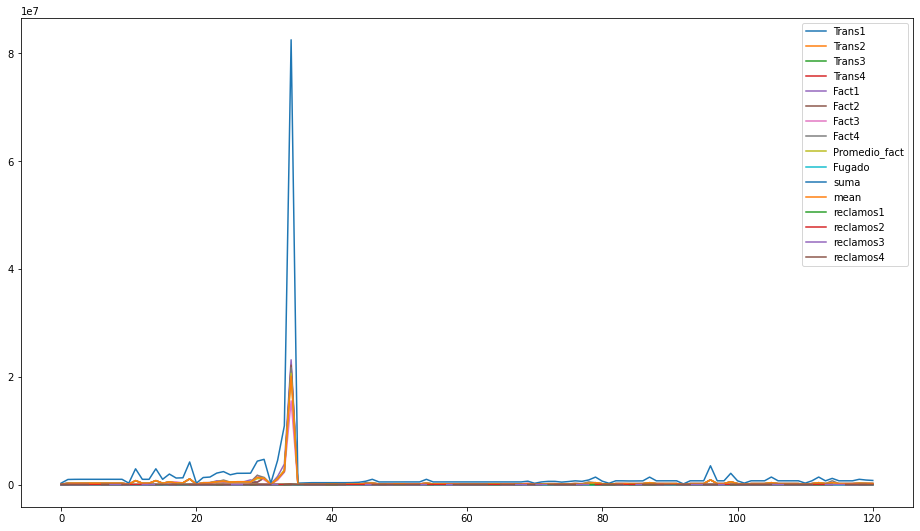

In [68]:
dfs.plot(figsize=(16,9))

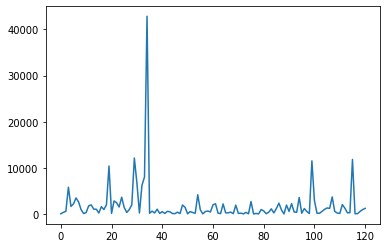

In [69]:
dfs['Trans1'].plot()

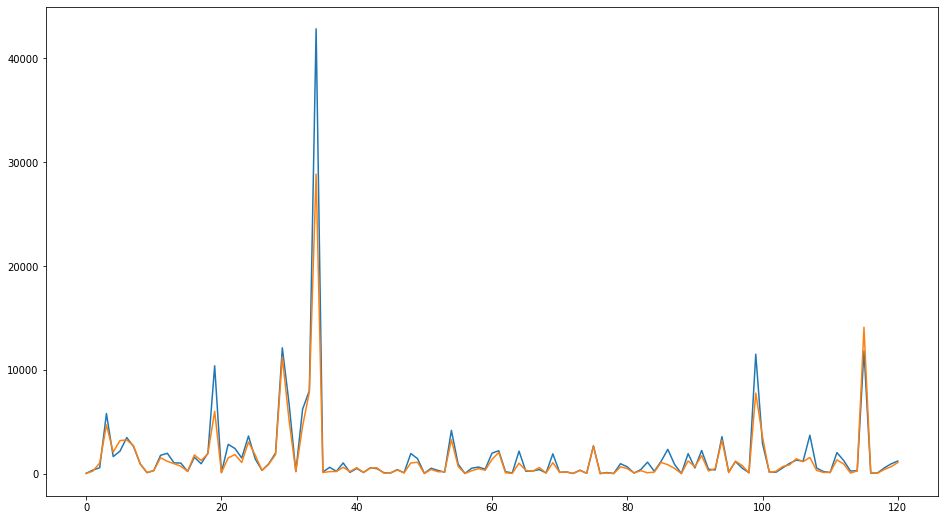

In [70]:
dfs['Trans1'].plot(figsize=(16,9))
dfs['Trans2'].plot(figsize=(16,9))

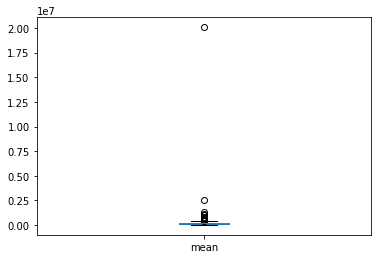

In [71]:
dfs['mean'].plot(kind='box')

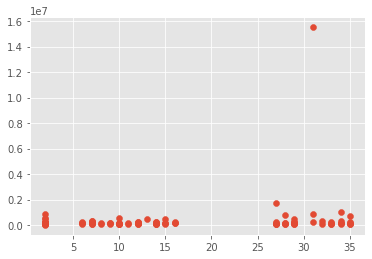

In [133]:
qw=dfs.copy()

plt.scatter(qw.reclamos3,qw.Fact3)

In [135]:
qw.Fugado.unique()

array([0])

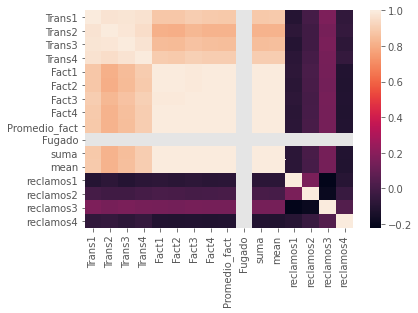

In [117]:
corr = dfs.corr()

sns.heatmap(corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)

In [72]:
plt.style.use('ggplot')

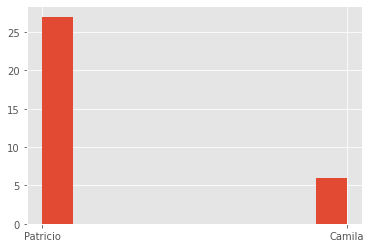

In [73]:
#Histogram of one column
dfs['encargado'].hist()

En el diagrama anterior ya se aprecian efectos potencialmente peligrosos de realizar una imputación "a la mala", a continuación se presentan otras situaciones que podrían pasarle en su carrera de Data Scientists

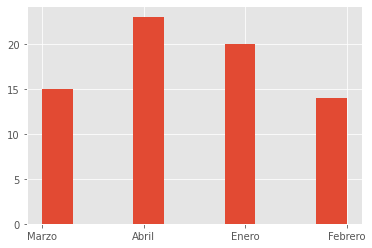

In [74]:
#histograma de la fecha de ultimo contacto
dfs.ultimo_contacto.hist()

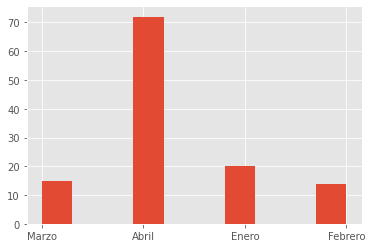

In [75]:
#veamos que ocurra si se reemplaza por la moda 
qw = dfs.copy() #creamos una copia de seguridad para no modificar el dataframe original

mode = qw['ultimo_contacto'].mode(dropna=True)

qw['ultimo_contacto'].fillna(value= mode[0], inplace=True)
qw['ultimo_contacto'].hist()

Un factor importante para revisar en las imputaciones es la distribución que tengan nuestros datos, para ello utilizaremos la libreria `seaborn` y nos fijaremos en las casillas de reclamos

In [77]:
#usamos un nuevo dataset (es la misma pero con mas filas)
df = pd.read_csv('Consolidado.csv')
df.shape

(123904, 20)

In [78]:
df.isna().sum()

Cliente                0
Trans1                 0
Trans2                 0
Trans3                 0
Trans4                 0
Fact1                  0
Fact2                  0
Fact3                  0
Fact4               9845
rubro               7168
region                 0
antiguos               0
primer_contacto    61952
ultimo_contacto    61952
encargado          24666
descuento              0
reclamos1          18432
reclamos2          15360
reclamos3          17408
reclamos4          13312
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


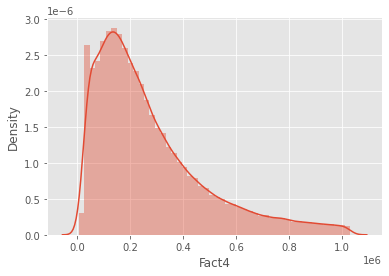

In [79]:
#codigo para graficar distribucion
sns.distplot(df['Fact4'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


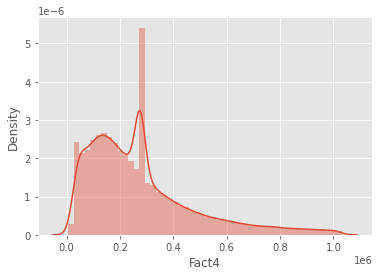

In [80]:
#veamos que pasa al reemplazar por la media
mean = df['Fact4'].mean(skipna=True)

qw = df.copy()

qw['Fact4'].fillna(mean, inplace=True)

sns.distplot(qw['Fact4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


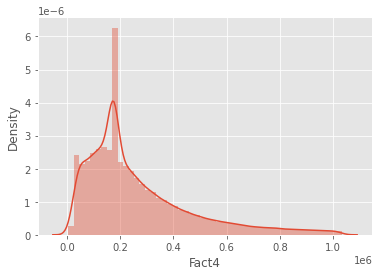

In [81]:
 #veamos que pasa al reemplazar por la moda
mode= df['Fact4'].mode(dropna=True)

qw = df.copy()

qw['Fact4'].fillna(mode[0], inplace=True)

sns.distplot(qw['Fact4'])

Una forma de evitar sesgos tan fuertes es imputar los datos por un valor variable...

Una forma de hacer esto asumiendo que el error esta distribuido de manera aleatoria dentro del DF es copiando data existente

Copiando data valida anterior -> backfill

Copiando data valida posterior -> forward fill

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


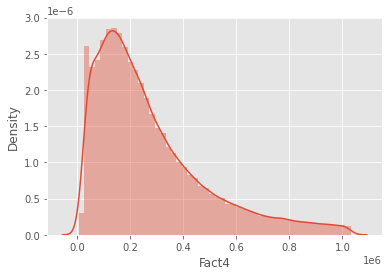

In [82]:
qw = df.copy()

qw['Fact4'].fillna(method='backfill', inplace=True)

sns.distplot(qw['Fact4'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


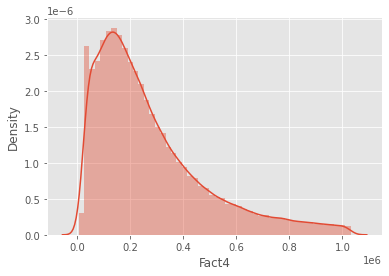

In [83]:
qw = df.copy()

qw['Fact4'].fillna(method='ffill', inplace=True)

sns.distplot(qw['Fact4'])

<b>El problema con estos metodos es que no representan de manera fiel el comportamiento de una observacion con las otras caracteristicas de esa fila</b>

EJ: Si tuvieramos data demografica, y en la fila anterior tenia una persona que media 1.40 mts y pesaba 52 kilos y me falta el peso de la fila siguente cuando se que alguien mide 2.02 mts es razonable decir que esa persona pesa 52Kg ?

Este error puede no ser un problema segun como se quiera usar la data, si solo quiero comparar distribuciones con un gran volumen no me va a afectar mucho la distribucion.

Si quiero agregar la data de manera muy resumida tampoco deberia afectar mucho los descriptivos

Si quiero entrenar un modelo puede que temine introduciendo error innecesario a mi modelo al no usar bien las tecnicas para imputar los datos

*Imputar usando informacion que si conocemos*

Una opcion para "adivinar" mejor esos datos faltantes es estimar que valor seria esperable con algun modelo predictivo

Para ese ejemplo usaremos una regresion lineal, pero para efectos practicos podriamos usar cualquier otro modelo que siga el tipo de prediccion que queremos con los datos que conocemos

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
qw = df.copy()

qw.dtypes

Cliente             object
Trans1             float64
Trans2             float64
Trans3             float64
Trans4             float64
Fact1              float64
Fact2              float64
Fact3              float64
Fact4              float64
rubro               object
region              object
antiguos            object
primer_contacto     object
ultimo_contacto     object
encargado           object
descuento           object
reclamos1          float64
reclamos2          float64
reclamos3          float64
reclamos4          float64
dtype: object

In [86]:
qw = qw[['Fact1','Fact2','Fact3','Fact4','Trans4']]

qw['Fact1'] =  pd.to_numeric(qw['Fact1'], errors='coerce')
qw['Fact2'] =  pd.to_numeric(qw['Fact2'], errors='coerce')
qw['Fact3'] =  pd.to_numeric(qw['Fact3'], errors='coerce')
qw['Fact4'] =  pd.to_numeric(qw['Fact4'], errors='coerce')
qw['Trans4'] =  pd.to_numeric(qw['Trans4'], errors='coerce')

In [87]:
linreg = LinearRegression()

#filtramos variables dependientes e independientes
x_vars = qw[qw['Fact4'].notnull()].drop(columns='Fact4')
y_var =  qw[qw['Fact4'].notnull()]['Fact4']

#filtamos las filas con datos faltantes para luego poder predecir el valor faltante
x_test = qw[qw['Fact4'].isnull()].drop(columns='Fact4')

In [88]:
x_test

,Fact1,Fact2,Fact3,Trans4
0,65836.0,66235.0,66453.0,14.000000
3,242125.0,242695.0,244268.0,9448.000000
5,242116.0,242695.0,244268.0,3155.000000
15,242116.0,242695.0,244268.0,745.000000
21,345881.0,346707.0,348954.0,3734.000000
...,...,...,...,...
123808,1255980.0,966023.0,143687.0,1349.030618
123816,12380257.0,19456784.0,5574165.0,11456.435604
123845,470454.0,274236.0,349419.0,5.098926
123846,147615.0,84520.0,139897.0,118.502269


In [89]:
linreg.fit(x_vars, y_var)

missing = linreg.predict(x_test)

In [90]:
qw.Fact4[qw['Fact4'].isnull()] = missing[0]

In [91]:
qw.isna().any()

Fact1     False
Fact2     False
Fact3     False
Fact4     False
Trans4    False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


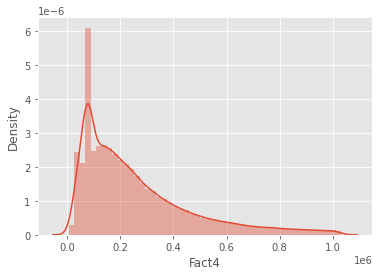

In [92]:
sns.distplot(qw['Fact4'])

¿Por que puede estar pasando? 

Se sugiere probar con otros imputers como *KNNImputer* o *SimpleImputer*

###Procesamiento de datos
Partamos con transformar categoricas

In [93]:
qw = df.copy()

qw = qw[['rubro','region','descuento','reclamos4','Trans4','Fact3','Fact4']]

qw['reclamos4'] =  pd.to_numeric(qw['reclamos4'], errors='coerce')
qw['Fact3'] =  pd.to_numeric(qw['Fact3'], errors='coerce')
qw['Fact4'] =  pd.to_numeric(qw['Fact4'], errors='coerce')
qw['Trans4'] =  pd.to_numeric(qw['Trans4'], errors='coerce')

In [94]:
falta = []
for i in range(len(qw)):
  if qw.iloc[i].Fact4 > 0:
    falta.append('Si')
  else:
    falta.append('No')

In [95]:
qw['falta']=falta

In [96]:
qw.columns

Index(['rubro', 'region', 'descuento', 'reclamos4', 'Trans4', 'Fact3', 'Fact4',
       'falta'],
      dtype='object')

In [97]:
#se debe chequear que no hayan na's
qw.isna().sum()

rubro         7168
region           0
descuento        0
reclamos4    13312
Trans4           0
Fact3            0
Fact4         9845
falta            0
dtype: int64

In [98]:
qw.dropna(subset=['rubro'], inplace=True)

In [99]:
qw.isna().sum()

rubro            0
region           0
descuento        0
reclamos4    13312
Trans4           0
Fact3            0
Fact4         9280
falta            0
dtype: int64

In [100]:
qw['reclamos4'].fillna(method='ffill', inplace=True)

In [101]:
qw.isna().sum()

rubro           0
region          0
descuento       0
reclamos4       0
Trans4          0
Fact3           0
Fact4        9280
falta           0
dtype: int64

In [102]:
qw = qw.drop(columns=['Fact4'])
print(qw.columns)
qw.isna().sum()

Index(['rubro', 'region', 'descuento', 'reclamos4', 'Trans4', 'Fact3',
       'falta'],
      dtype='object')


rubro        0
region       0
descuento    0
reclamos4    0
Trans4       0
Fact3        0
falta        0
dtype: int64

In [103]:
#dividimos el dataset en var dependiente(y) e independientes(y)
X = qw.iloc[:, :-1].values
y = qw.iloc[:, -1].values

In [104]:
#Para procesar variables independientes / categoricas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [105]:
X

array([['Salud', 'Metropolitana', 'No', 8.0, 14.0, 66453.0],
       ['Mineria', 'Antofagasta', 'No', 8.0, 480.0, 282487.88],
       ['Mineria', 'Antofagasta', 'No', 12.0, 713.0, 254853.9],
       ...,
       ['Mineria', 'Antofagasta', 'Si', 2.7238273689522954,
        871.8009125311522, 354952.38],
       ['Retail', 'Metropolitana', 'No', 1.9513127576258316,
        1126.2976645276347, 675925.38],
       ['Mineria', 'Antofagasta', 'No', 38.26536570446414,
        706.7012782593578, 59648.36]], dtype=object)

In [106]:
#Traspasamos las columnas a categoricas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [107]:
X[:,:3]

array([[0.0, 0.0, 0.0],
       [0.0, 0.0, 1.0],
       [0.0, 0.0, 1.0],
       ...,
       [0.0, 0.0, 1.0],
       [0.0, 0.0, 0.0],
       [0.0, 0.0, 1.0]], dtype=object)

In [108]:
X[:,-3:]

array([[8.0, 14.0, 66453.0],
       [8.0, 480.0, 282487.88],
       [12.0, 713.0, 254853.9],
       ...,
       [2.7238273689522954, 871.8009125311522, 354952.38],
       [1.9513127576258316, 1126.2976645276347, 675925.38],
       [38.26536570446414, 706.7012782593578, 59648.36]], dtype=object)

In [109]:
#dividir dataset en test/train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [110]:
#procesar variables independientes/numericas
from sklearn.preprocessing import StandardScaler #tambien pueden usarse otras formas revisen robustscaler y minmaxscaler
sc = StandardScaler()
X_train[:, -3:] = sc.fit_transform(X_train[:, -3:])
X_test[:, -3:] = sc.transform(X_test[:, -3:])

In [111]:
#procesar variable dependiente
y

array(['No', 'Si', 'Si', ..., 'Si', 'Si', 'Si'], dtype=object)

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [113]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [114]:
X.shape

(116736, 15)